# Data Preparation:
---

In [8]:
import functions
import pandas as pd
from sklearn import *;
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek


def balance_sample_prepare(traindf,sampleSize=15000):
    data1 = traindf[traindf['designDefect']==1]
    data0 = traindf[traindf['designDefect']==0]
    data0 = data0.sample(sampleSize)
    traindf = data0
    traindf = traindf.append(data1)
    y = traindf.pop('designDefect')
    X = traindf
    smt = SMOTETomek(ratio='auto')
    X_smt, y_smt = smt.fit_sample(X, y)
    
    df = pd.DataFrame(X,columns=columns[:-2])
    df['designDefect'] = 0
    df['designDefect'] = y
    
    for col in df:
        df[col] = df[col].astype(int)
    
    return df

In [9]:
# READ AND CREATE A SINGLE TRAINING DATASET

mockito = functions.process_project_data('mockito',exploratory=True)
wildfly = functions.process_project_data('wildfly',exploratory=True)
ant = functions.process_project_data('ant',exploratory=True)


mockito = functions.limit_data_dict(mockito)
wildfly = functions.limit_data_dict(wildfly)
ant = functions.limit_data_dict(ant)

columns = mockito[list(mockito.keys())[0]].columns
traindf = pd.DataFrame(columns=columns)

for ver in mockito:
    traindf = traindf.append(mockito[ver],sort=True)
for ver in wildfly:
    traindf = traindf.append(wildfly[ver],sort=True)
for ver in ant:
    traindf = traindf.append(ant[ver],sort=True)

### Balance of classes:



designDefect
0    258936
1     14853
Name: designDefect, dtype: int64

 OUTPUT = 1, REPRESENS ONLY : 5  PRECENT OF THE TOTAL DATA 



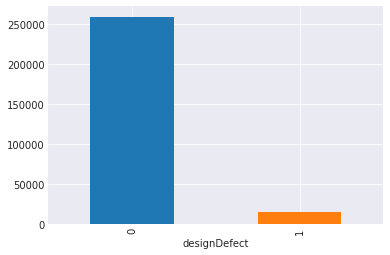

In [3]:
# CHECK THE BALANCE OF DATASET
d = traindf.groupby('designDefect')['designDefect'].count()
d.plot(kind = 'bar')
print('\n')
print(d)
print("\n OUTPUT = 1, REPRESENS ONLY : %d  PRECENT OF THE TOTAL DATA \n"% ((d[1]/d[0])*100))

**BALANCING USING SMOTE:**
- Smote is a Machine Leanrning based balancing algorithm.
- Uses KNN to distinguish the classes.

In [4]:
traindf = balance_sample_prepare(traindf,100000)

/home/harsh/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/home/harsh/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/home/harsh/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/home/harsh/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))




designDefect
0    100000
1     14853
Name: designDefect, dtype: int64

 OUTPUT = 1, NOW REPRESENTS : 14  PRECENT OF THE TOTAL DATA 



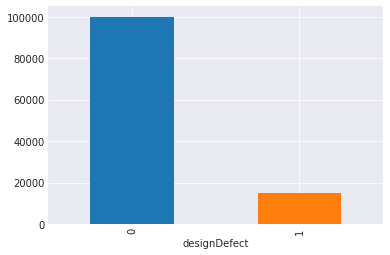

In [5]:
# CHECK THE BALANCE OF DATASET
# AFTER BALANCING 

d = traindf.groupby('designDefect')['designDefect'].count()
d.plot(kind = 'bar')
print('\n')
print(d)
print("\n OUTPUT = 1, NOW REPRESENTS : %d  PRECENT OF THE TOTAL DATA \n"% ((d[1]/d[0])*100))

---
### Export for Model preparation:
---

In [11]:
for col in traindf:
    traindf[col] = traindf[col].astype(int)
traindf.to_csv('data/trainset.csv')